In [1]:
import networkx as nx
import sys
sys.path.insert(0, 'code/')
from Utils import *
import pandas as pd
import accessibility
import breadth
import data_amount
import data_qual
import recency

In [6]:

def get_single_data(url, lst, f):
    """
    Tries a url with a certain category, then if it returns the correct data type 
    and doesn't errror, then it will add the score from the category into the
    list. Returns the score. 
    """
    try:
        temp = f(url)
    except Exception as e:
        print("There was an error: {}".format(e))
        return "?"
    return temp
        
def main():
    all_city_dataset = 'data/all_city_data.csv'
    accessibility_list = []
    breadth_list = []
    quality_list = []
    amount_list = []
    recency_list = []
    category_dict = {accessibility: accessibility_list, 
                     breadth:breadth_list, 
                     data_amount: amount_list,
                     data_qual: quality_list,
                     recency: recency_list}
    df = read_from_csv(all_city_dataset)
    for url in df['City Open Data URL']:
        for func in category_dict:
            category_dict[func] += [get_single_data(url, category_dict[func], func.main)]
            print('Checking {} for {}'.format(url, func.name()))
    for mod in category_dict:
        write_to_csv(mod.name(), category_dict[mod], all_city_dataset)
    return category_dict
main()

Checking https://data.cityofberkeley.info for Accessibility of Data
There was an error: 'NoneType' object has no attribute 'group'
Checking https://data.cityofberkeley.info for Breadth of Dataset
Checking https://data.cityofberkeley.info for Amount of Data
There was an error: main() takes 0 positional arguments but 1 was given
Checking https://data.cityofberkeley.info for Quality of Data
228598
Checking https://data.cityofberkeley.info for Recency of dataset
Checking https://data.sfgov.org for Accessibility of Data
There was an error: HTTP Error 403: Forbidden
Checking https://data.sfgov.org for Breadth of Dataset
Checking https://data.sfgov.org for Amount of Data
There was an error: main() takes 0 positional arguments but 1 was given
Checking https://data.sfgov.org for Quality of Data
228598
Checking https://data.sfgov.org for Recency of dataset
Checking https://data.oaklandnet.com for Accessibility of Data
There was an error: 'NoneType' object has no attribute 'group'
Checking https:

{<module 'accessibility' from 'code/accessibility.py'>: [0, 0, 0, 0, 0],
 <module 'breadth' from 'code/breadth.py'>: ['?', '?', '?', '?', '?'],
 <module 'data_amount' from 'code/data_amount.py'>: [25, 299, 115, 144, 13],
 <module 'data_qual' from 'code/data_qual.py'>: ['?', '?', '?', '?', '?'],
 <module 'recency' from 'code/recency.py'>: [228598,
  228598,
  228598,
  228598,
  228598]}

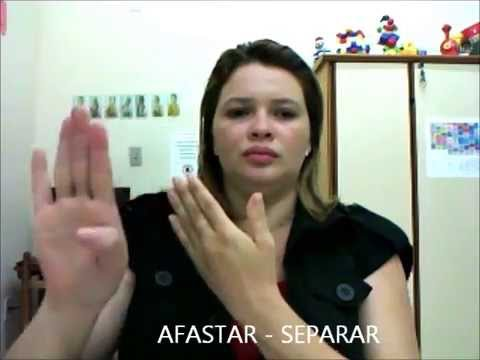

In [9]:
# read_from_csv('data/all_city_data.csv')
# from IPython.lib.display import YouTubeVideo
# YouTubeVideo("mhIcuMZmyWM")